In [14]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200


In [15]:
# ========== Redressement OHMIQUE ========

t, u, v = np.loadtxt("./redress_ohmique.csv", dtype=float, delimiter=',', skiprows=2, unpack=True)


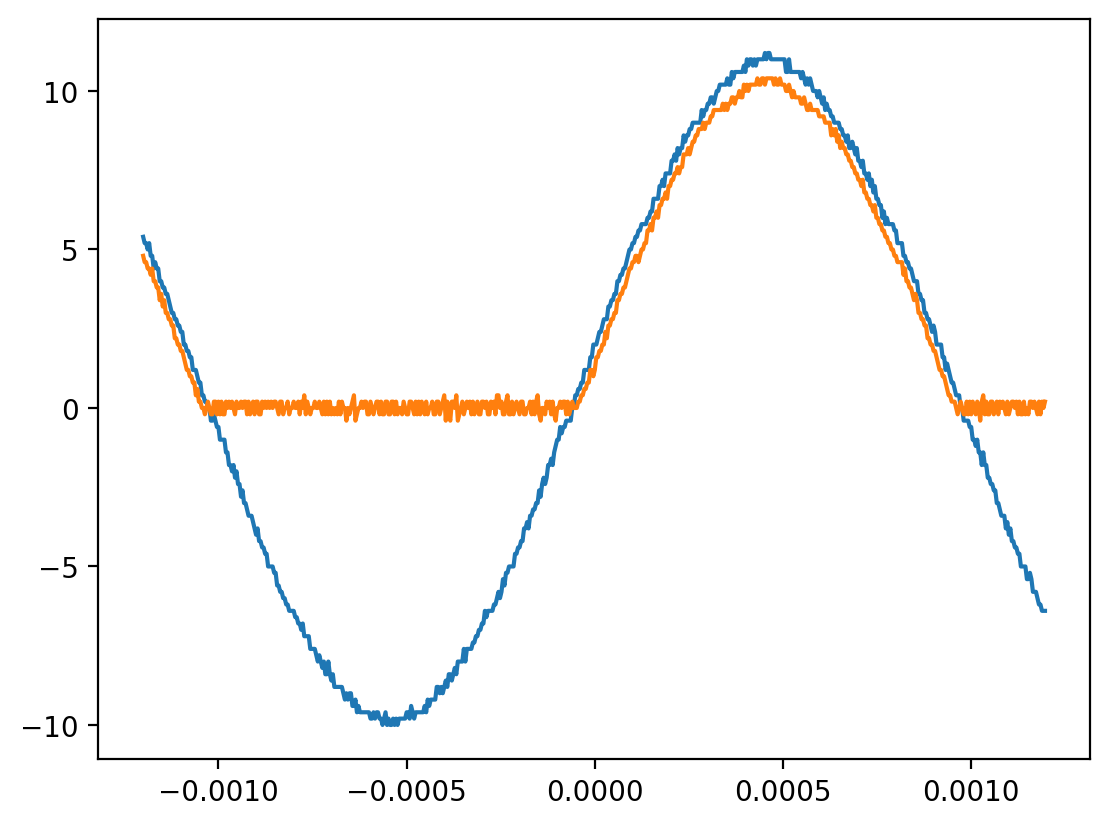

In [16]:
#données extraites

plt.plot(t, u)
plt.plot(t, v)

plt.show()

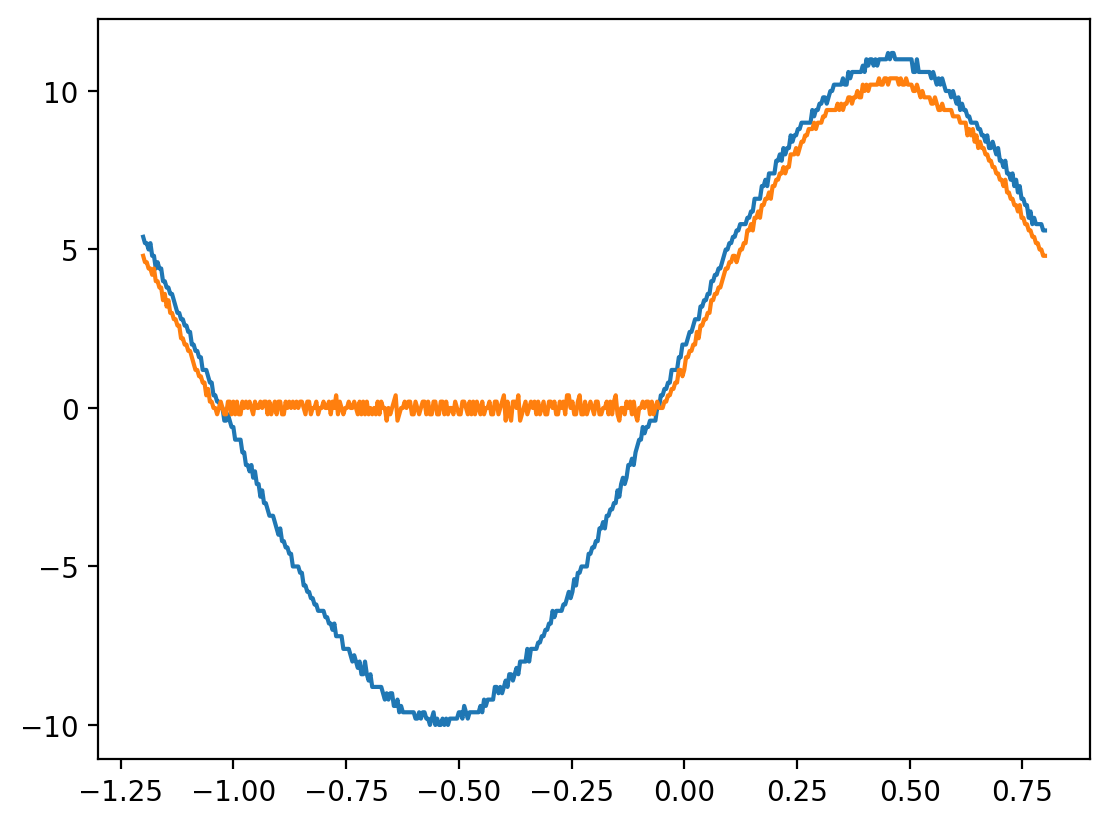

In [17]:
def rase_periode(s):
    T = [] 
    compteur = 0

    for i in range(1, len(s), 5):
        if (s[i-5] - s[0]) * (s[i] - s[0]) <= 0:
            compteur += 1
            T.append(i)
    
    if compteur%2 == 1 :
        return T[-2]
    else :
        return T[-1]
    
    

T = rase_periode(u)

newt = [s*1000 for s in t]

plt.plot(newt[:T], u[:T])
plt.plot(newt[:T], v[:T])
plt.show()

In [18]:
def val_eff(s):
    #valeur efficace
    s = s[:rase_periode(s)]
    
    return np.sqrt(np.mean( s**2))


def val_eff_ctrd(s):
    #valeur efficace centrée
    s = s[:rase_periode(s)]

    return np.sqrt( np.mean( s**2 ) - np.mean(s)**2 )


def moy(s):
    return np.mean(s[:rase_periode(s)])


def print_info(s):
    print(f"\t-Valeur moyenne : {moy(s)}")
    print(f"\t-Valeur efficace : {val_eff(s)}")
    print(f"\t-Valeur efficace centrée : {val_eff_ctrd(s)}")


print_info(v)




	-Valeur moyenne : 3.2550894750498998
	-Valeur efficace : 5.10121115633115
	-Valeur efficace centrée : 3.9276898771283815
